# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.7/site-packages"
# Restart the Kernel before you move on to the next step.

In [2]:
# Do not execute the commands below unless you have restart the Kernel after updating the PATH. 
# !python -m pip install torch==1.0.0

In [3]:
# Check torch version and CUDA status if GPU is enabled.
import torch
print(torch.__version__)
print(torch.cuda.is_available()) # Should return True when GPU is enabled. 

1.11.0+cu102
True


In [4]:
# !pip install torch

In [5]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

#### Important: Restart the Kernel before you move on to the next step.

In [4]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 172 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 50.7 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 76.1 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 66.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 54.3 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 71.6 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 65.3 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 77.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 64.6 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 76.7 MB/s eta 0:00:01
     |██████████████████

In [5]:
# !pip install ipywidgets

## Imports

In [6]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms, models

from PIL import Image

# Config image display criteria 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# from collections import OrderedDict
# import helper
# import time


In [7]:
def view_in_detail(image):
    img = np.squeeze(np.array(image))

    fig, sub = plt.subplots(figsize = (12,12)) 
    sub.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            sub.annotate(str(val), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
            sub.axis("off")

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [7]:
# !pip install ipywidgets widgetsnbextension pandas-profiling 

In [8]:
# !pip install ipywidgets 
# !pip install widgetsnbextension 
# !pip install pandas-profiling 

In [9]:
# !pip install ipywidgets 
# !pip install nodejs 
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !jupyter nbextension enable --py widgetsnbextension 
# !pip install ipywidgets
# !pip install FloatProgress 
# import FloatProgress 

In [10]:
# !pip install ipywidgets 
# import ipywidgets 

In [8]:
# Define transforms
## YOUR CODE HERE ## 

# data_root_dir = './data' 
# norm_mean = [0.485, 0.456, 0.406] 
# norm_std = [0.229, 0.224, 0.225]
# img_scale = 255 
# img_crop = 244 
# batch_size = 32

# train_transforms = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Resize(img_scale),
#     transforms.RandomRotation(30),
#     transforms.RandomResizedCrop(img_crop),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomAffine(scale=(0.9, 1.1), translate=(0.1, 0.1), degrees=10, fill=0, interpolation=transforms.InterpolationMode.BILINEAR) 
#     transforms.Normalize(norm_mean, norm_std),
# ])
# test_transforms = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Resize(img_scale),
#     transforms.CenterCrop(img_crop),
#     transforms.Normalize(norm_mean, norm_std),
# ])



data_root_dir = './data' 
norm_mean = [0.5] 
norm_std = [0.5]
img_scale = 28 
scale = [0.9, 1.1] 
translate = [0.1, 0.1] 
rotate = 180 
batch_size = 64 
flip = 0.1 

train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(img_scale),
#     transforms.RandomRotation(rotate), 
#     transforms.RandomHorizontalFlip(flip),
    transforms.RandomAffine(scale=scale, translate=translate, degrees=rotate, fill=0, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Normalize(norm_mean, norm_std),
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(img_scale),
    transforms.Normalize(norm_mean, norm_std),
])

# train_transforms = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Resize(img_scale),
#     transforms.RandomRotation(rotate), 
#     transforms.RandomHorizontalFlip(flip),
#     transforms.RandomAffine(scale=scale, translate=translate, degrees=rotate, fill=0, interpolation=transforms.InterpolationMode.BILINEAR),
#     transforms.Normalize(norm_mean, norm_std),
# ])
# test_transforms = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Resize(img_scale),
#     transforms.Normalize(norm_mean, norm_std),
# ])

# random_affine = transforms.RandomAffine(scale=(0.9, 1.1), translate=(0.1, 0.1), degrees=10, fill=0, interpolation=transforms.InterpolationMode.BILINEAR)

In [9]:
# Create training set and define training dataloader
## YOUR CODE HERE ##
training_data = datasets.MNIST(root=data_root_dir, train=True, download=True, transform=train_transforms) 
print(training_data)


training_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
print(training_loader) 


train_data, val_data = torch.utils.data.random_split(training_data, [50000, 10000])

# train_data = datasets.MNIST(train_data)

print('=====>', type(training_data), type(train_data))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(train_loader) 

val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
val_loader


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=28, interpolation=bilinear, max_size=None, antialias=None)
               RandomAffine(degrees=[-180.0, 180.0], translate=[0.1, 0.1], scale=[0.9, 1.1], interpolation=bilinear)
               Normalize(mean=[0.5], std=[0.5])
           )
=====> <class 'torchvision.datasets.mnist.MNIST'> <class 'torch.utils.data.dataset.Subset'>


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [10]:
# # train_data.__dict__#, len(train_data['indices']) 
# # training_data.data[0].shape
# train_data.__dict__
# # train_data.dataset.data.shape
# len(train_data.indices) 
# # train_data.indices 

In [11]:
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = datasets.MNIST(root=data_root_dir, train=False, download=True, transform=test_transforms) 
print(test_data) 

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
test_loader


Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=28, interpolation=bilinear, max_size=None, antialias=None)
               Normalize(mean=[0.5], std=[0.5])
           )


In [15]:
# train_data.data, train_data.targets

In [16]:
# train_data.data.shape

In [12]:
test_data.data.shape

torch.Size([10000, 28, 28])

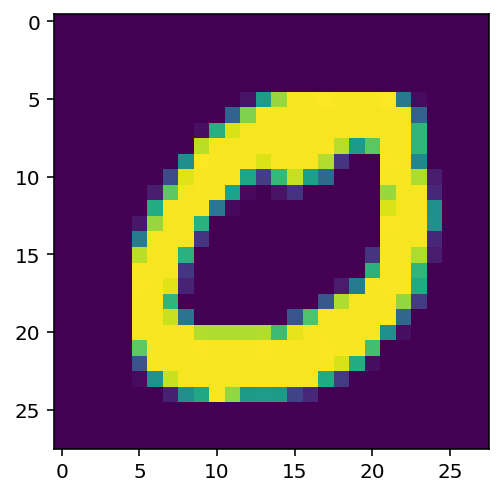

In [13]:
i = 0 
indx = train_data.indices[i] 
plt.imshow(train_data.dataset.data[indx]);

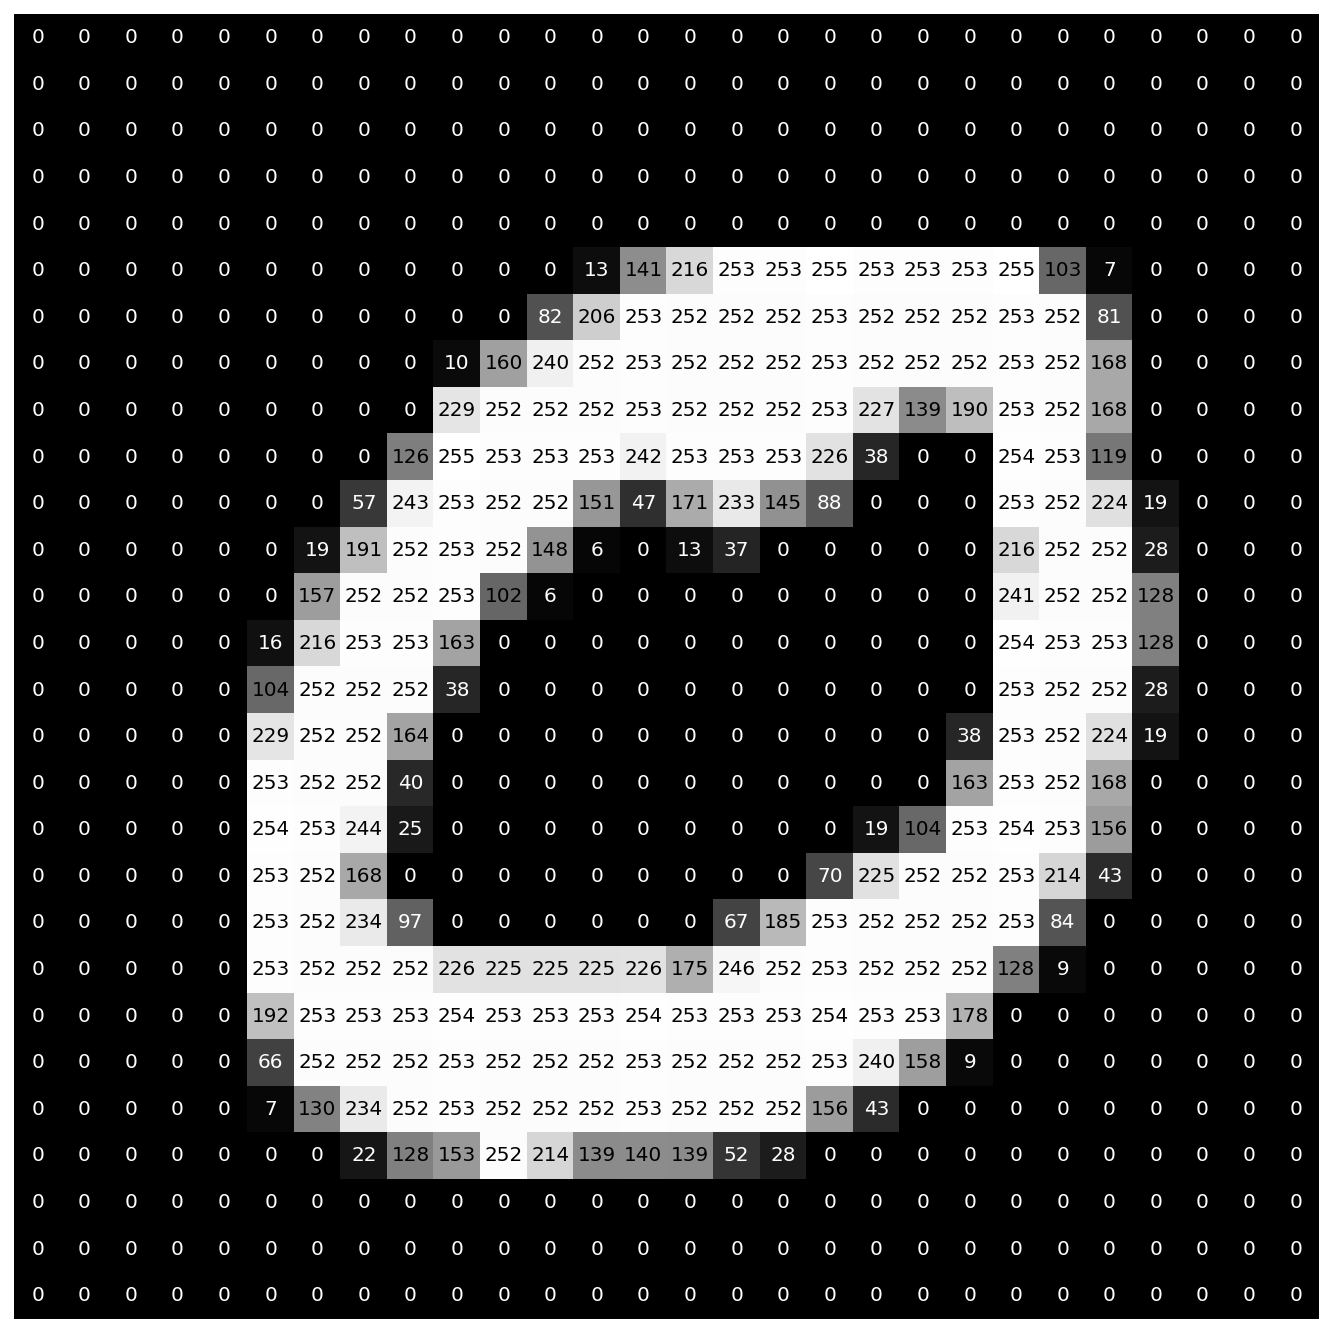

In [14]:
img_numpy = train_data.dataset.data[indx].numpy()
# view_in_detail(train_transforms(img_numpy))
view_in_detail(img_numpy)

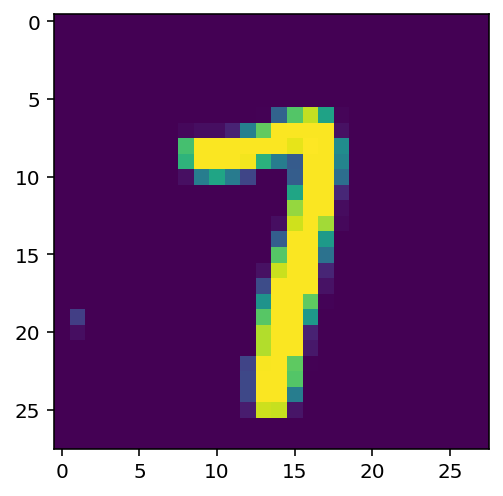

In [15]:
i = 0 
indx = val_data.indices[i] 
plt.imshow(val_data.dataset.data[indx]);

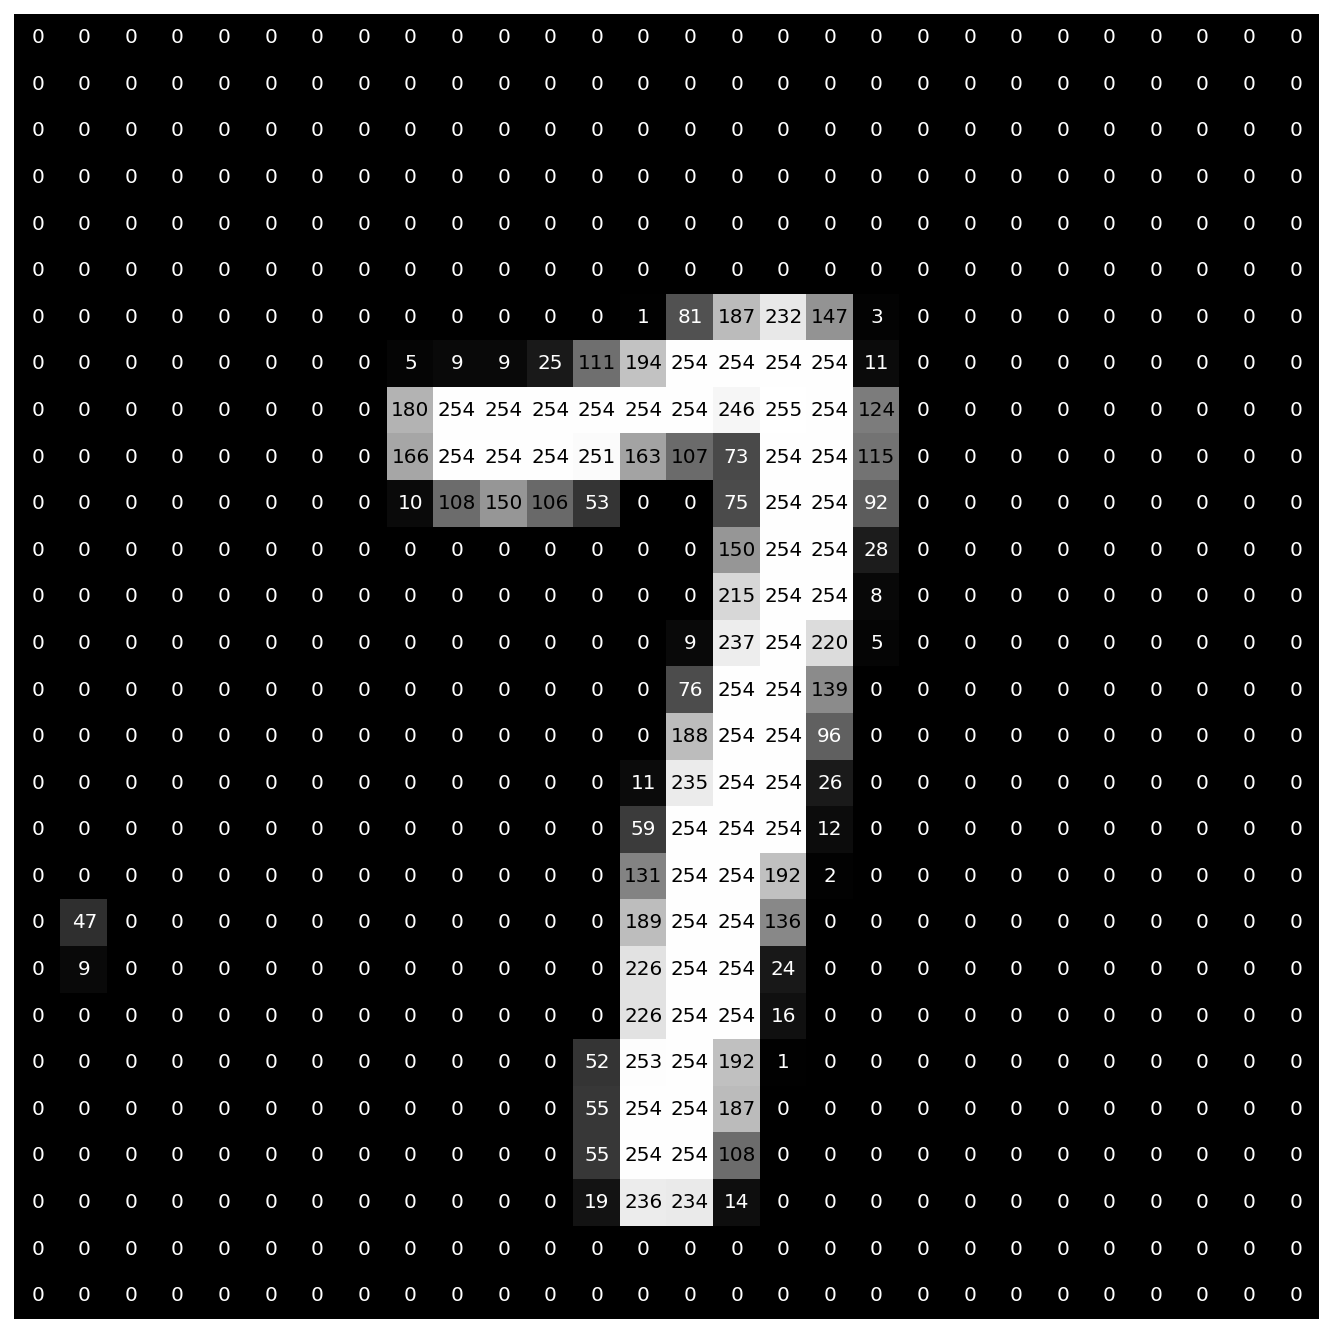

In [16]:
img_numpy = val_data.dataset.data[indx].numpy()
# view_in_detail(train_transforms(img_numpy))
view_in_detail(img_numpy)

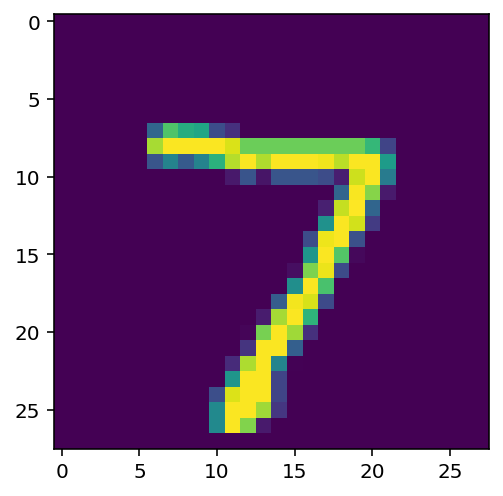

In [17]:
indx = i 
plt.imshow(test_data.data[indx]);

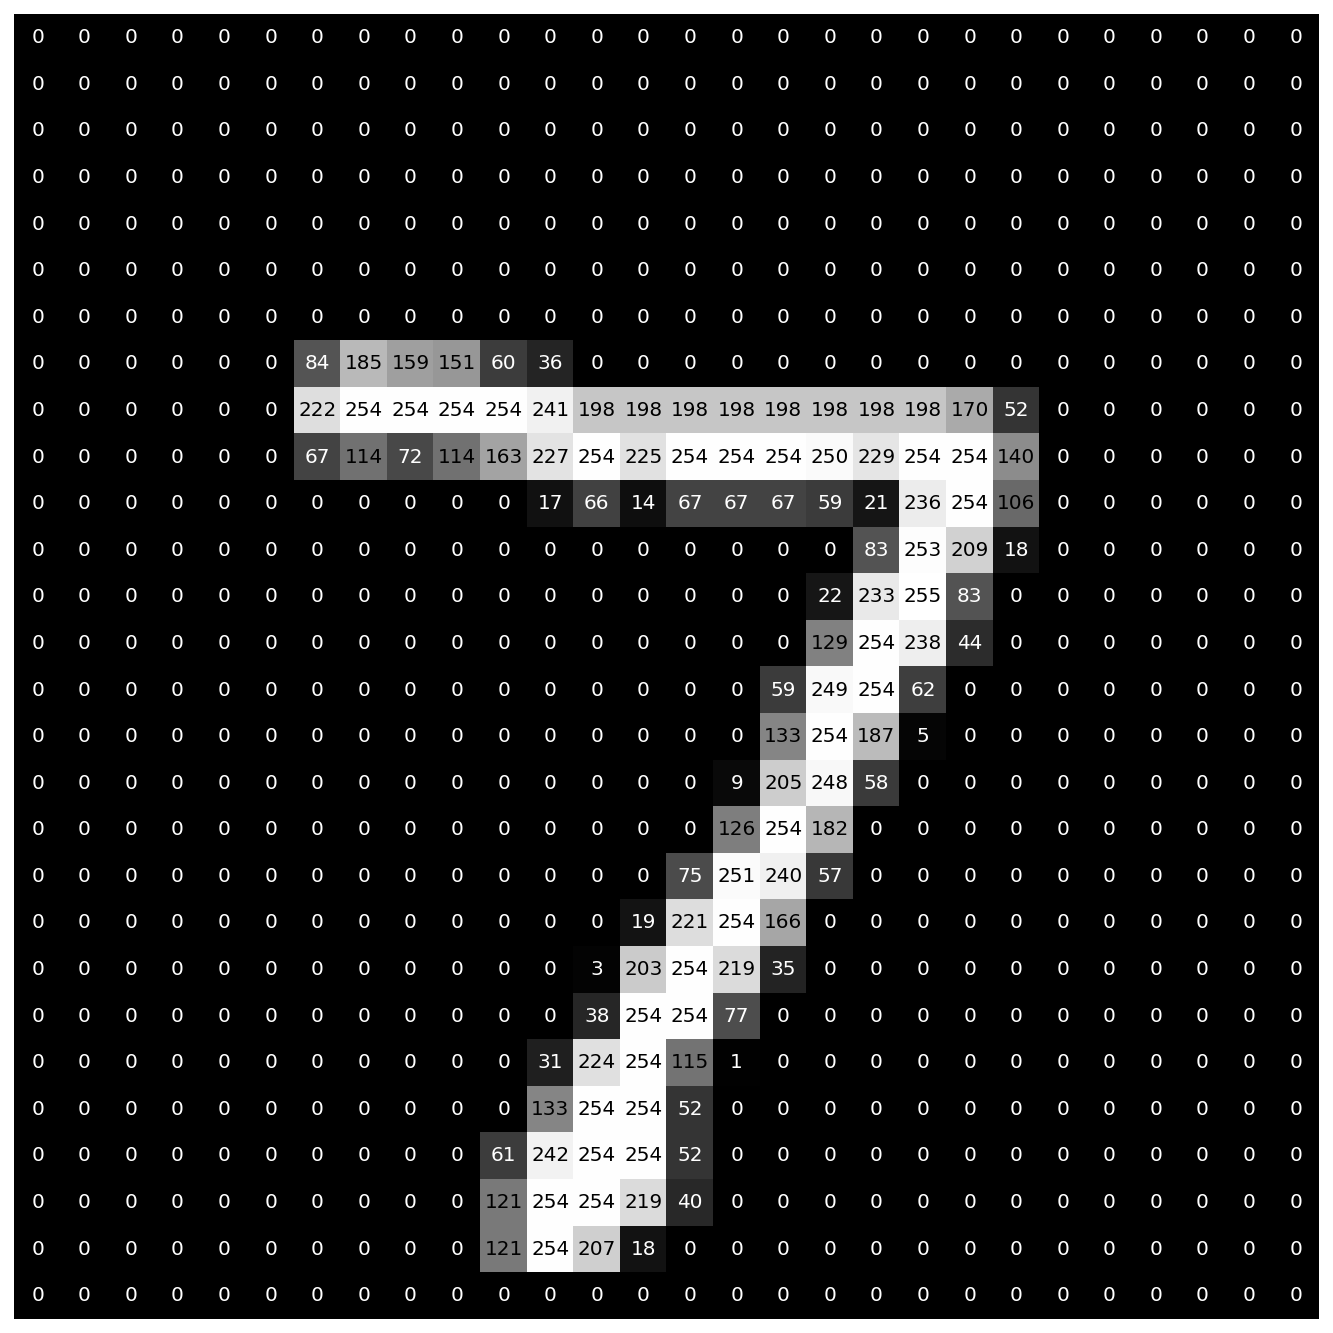

In [18]:
img_numpy = test_data.data[indx].numpy()
# view_in_detail(train_transforms(img_numpy))
view_in_detail(img_numpy)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [19]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


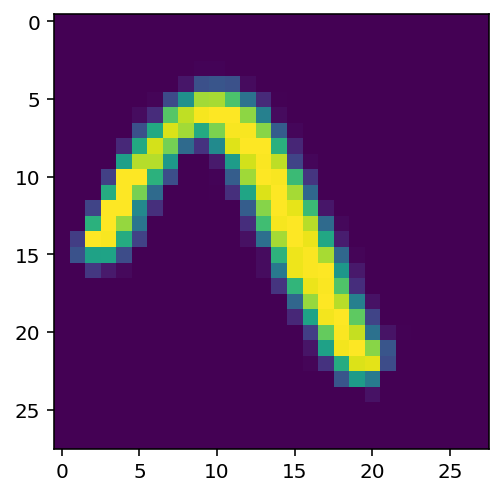

9


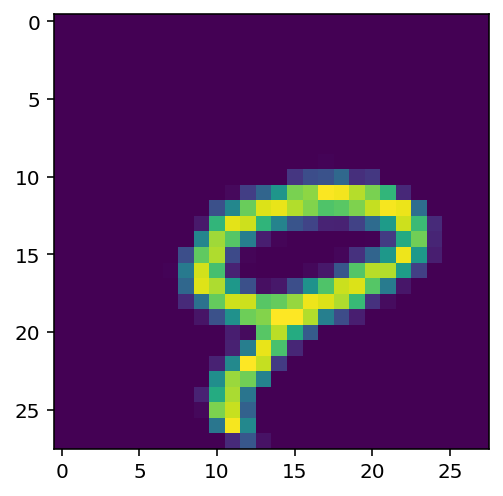

0


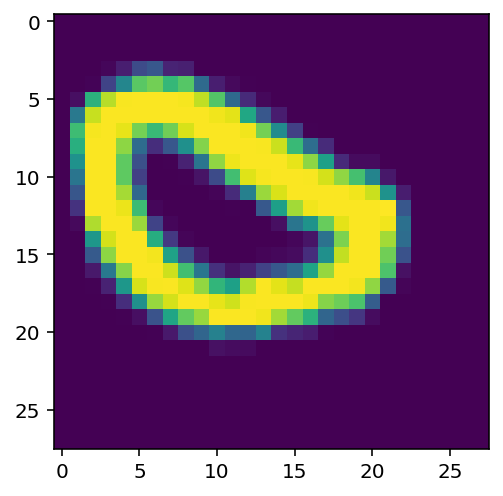

2


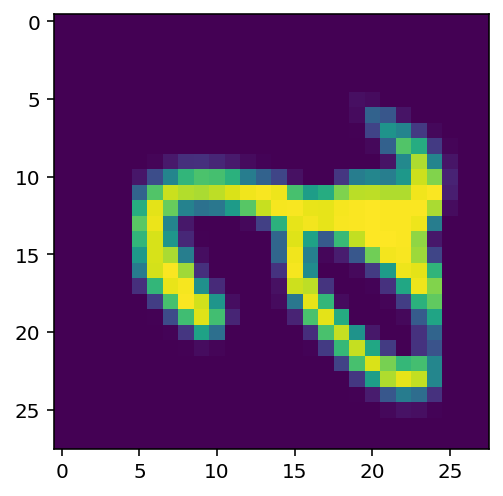

2


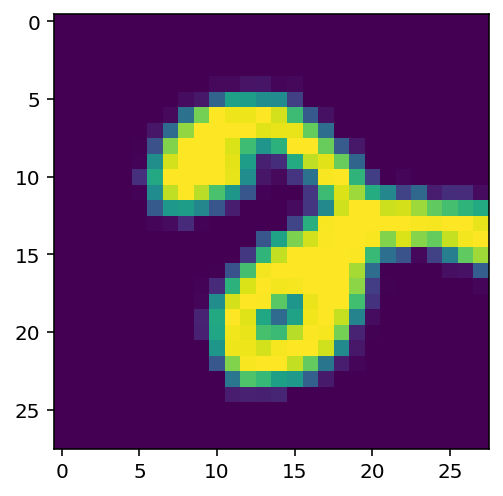

In [20]:
# Explore data
## YOUR CODE HERE ##

show5(train_loader)

7


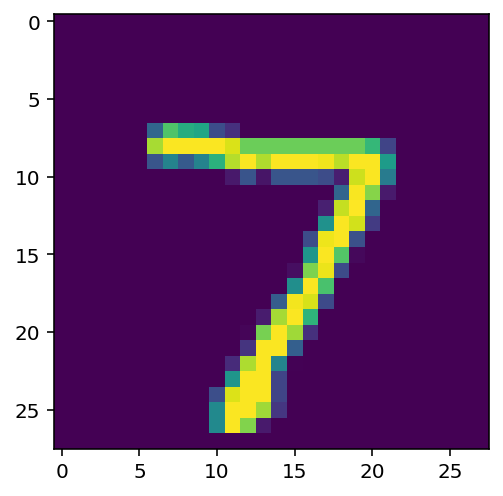

2


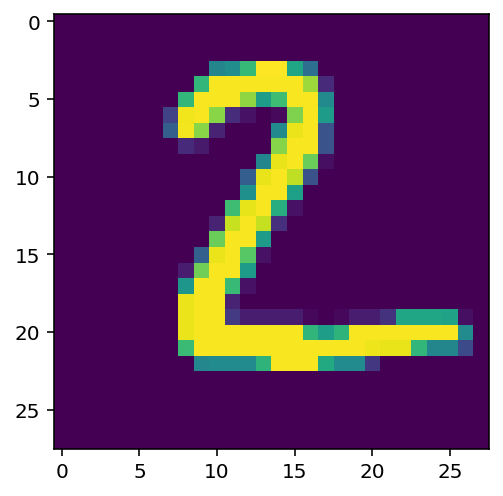

1


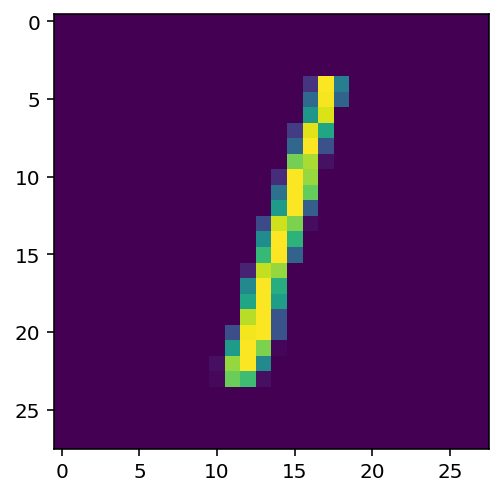

0


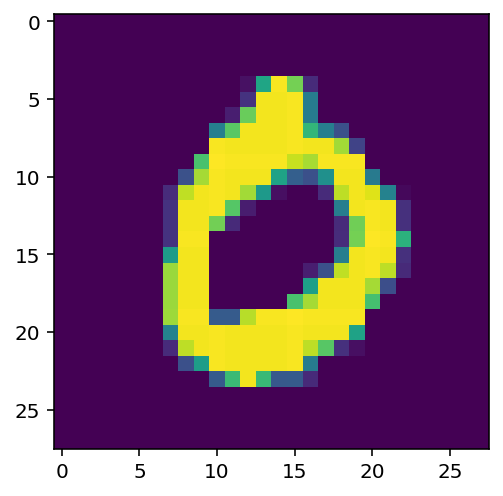

4


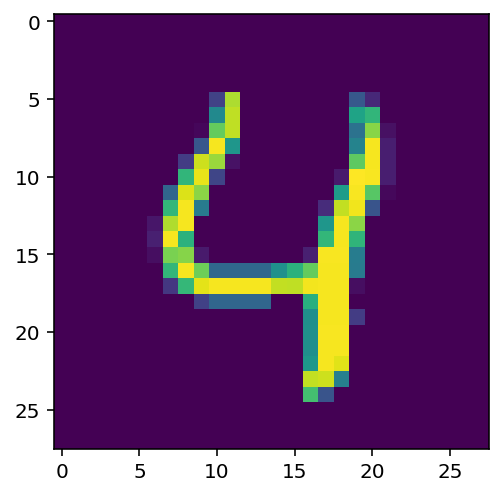

In [21]:
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [22]:
## YOUR CODE HERE ##

class Proj2NN_V1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        hidden_size = hidden_size[0]
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.log_softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.log_softmax(x) 
        return x
    


class Proj2NN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.all_layers =  nn.ModuleList()  
        
        flatten = nn.Flatten()  
        self.all_layers.append(flatten) 
        
        input_layer = nn.Linear(input_size, hidden_size[0])
        self.all_layers.append(input_layer) 
        
        for i in range(len(hidden_size)-1):
            hidden_layer = nn.Linear(hidden_size[i], hidden_size[i+1])
            self.all_layers.append(hidden_layer) 
        
        output_layer = nn.Linear(hidden_size[-1], num_classes)
        self.all_layers.append(output_layer) 
#         print(f'Total layers: {len(self.all_layers)}')
        
        
    def forward(self, x):
        i = 2 
        x = self.all_layers[0](x)        
        for layer in self.all_layers[1:-1]: 
            x = layer(x) 
            x = F.relu(x)  
            i += 1 
        x = self.all_layers[-1](x) 
        x = F.log_softmax(x, dim=1) 
#         x = F.log_softmax(self.all_layers[-1](x)) 
#         x = F.log_softmax(self.all_layers[-1](x), dim=1) 
#         print(f'Total layers forwarded: {i}')
        return x


def create_model(model_type, input_size, num_classes): 
    # Create model
    model = None 
    if model_type==0:
        model = Proj2NN(input_size, [128, 128], num_classes)
    elif model_type==1:
        model = Proj2NN(input_size, [128, 64], num_classes)
    elif model_type==2:
        model = Proj2NN(input_size, [128, 64, 32], num_classes)
    elif model_type==3:
        model = Proj2NN(input_size, [128, 128, 32], num_classes)
    elif model_type==4:
        model = Proj2NN(input_size, [256, 128, 64], num_classes)
    elif model_type==5:
        model = Proj2NN(input_size, [256, 128, 64, 32], num_classes)
    elif model_type==6:
        model = Proj2NN(input_size, [512, 256, 128], num_classes)
    elif model_type==7:
        model = Proj2NN(input_size, [512, 256, 128, 64, 32], num_classes)
    elif model_type==8:
        model = Proj2NN(input_size, [1024, 512, 256], num_classes)
    elif model_type==9:
        model = Proj2NN(input_size, [1024, 512, 256, 128], num_classes)
    else:
        model = Proj2NN(input_size, [128], num_classes)
    return model
    

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [31]:
## YOUR CODE HERE ##

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [23]:
## YOUR CODE HERE ##

# Training the model
def train_model(model, trainloader, validationloader, criterion, optimizer, epochs=5, print_every=20, device='cuda'):
    # Initialise the common variables used in the training process
    train_loss_rec = [] 
    val_loss_rec = [] 
    val_acc_rec = [] 
    
    steps = 0
    running_loss = 0
    
    # start = time.time()
    for epoch in range(epochs):
    #     ep_start = time.time()
        for inputs, labels in trainloader:
    #         bt_start = time.time()
            steps += 1
            # Move input and label tensors to the default device
            inputs, labels = inputs.to(device), labels.to(device)

            logps = model(inputs)
            loss = criterion(logps, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
            
            # Model validation after n batches
            if steps % print_every == 0:
                validation_loss = 0
                accuracy = 0
                model.eval()
                with torch.no_grad():
                    for inputs, labels in validationloader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        logps = model(inputs)
                        batch_loss = criterion(logps, labels)

                        validation_loss += batch_loss.item()

                        # Calculate accuracy
                        ps = torch.exp(logps)
                        top_p, top_class = ps.topk(1, dim=1)
                        equals = top_class == labels.view(*top_class.shape)
                        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

                print(f"Epoch {epoch+1}/{epochs}.. "
                      f"Train loss: {running_loss/print_every:.4f}.. "
                      f"Validation loss: {validation_loss/len(validationloader):.4f}.. "
                      f"Validation accuracy: {(accuracy/len(validationloader))*100:.2f}")

                train_loss_rec.append(running_loss/print_every)  
                val_loss_rec.append(validation_loss/len(validationloader))
                val_acc_rec.append((accuracy/len(validationloader))*100)
                running_loss = 0
                model.train()
#                 save_model(model, model_type, model_name, num_output, criterion, optimizer, train_data)

    #         print(f"Total batch time: {(time.time() - bt_start):.3f} seconds\n")
    #     print(f"Total epoch time: {(time.time() - ep_start):.3f} seconds")            
    # print(f"Total training time: {(time.time() - start):.3f} seconds")
    return train_loss_rec, val_loss_rec, val_acc_rec 
    

In [34]:
# Hyperparameters - Set up variables for training and testing criteria 
input_size = img_scale * img_scale 
hidden_size = [128]
num_classes = 10
num_epochs = 5
print_every = 10 #5 #20 
learning_rate = 0.001
# ##batch_size = 32 


## Creating model and setting criterion & optimizer
# Model 
# model = Proj2NN_V1(input_size, hidden_size, num_classes)

exp_group = 10**2 
model_type = 9
model = create_model(model_type, input_size, num_classes)

# Loss function 
criterion = nn.NLLLoss()
# criterion = nn.CrossEntropyLoss()

# Optimizer 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)
# optimizer = optim.Adamax(model.parameters(), lr=learning_rate)



# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print(device) 

# Move the model to appropriate device
model.to(device)


# Model summary 
print(model) 
print(list(model.parameters())) 


cuda
Proj2NN(
  (all_layers): ModuleList(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)
[Parameter containing:
tensor([[-0.0303,  0.0243, -0.0034,  ..., -0.0268,  0.0130, -0.0179],
        [-0.0305,  0.0202,  0.0228,  ...,  0.0304, -0.0006, -0.0036],
        [ 0.0022, -0.0073,  0.0282,  ...,  0.0228,  0.0087,  0.0117],
        ...,
        [ 0.0057, -0.0138, -0.0261,  ...,  0.0091, -0.0043,  0.0053],
        [ 0.0237, -0.0278, -0.0227,  ..., -0.0177,  0.0314,  0.0161],
        [-0.0147, -0.0106, -0.0208,  ...,  0.0283,  0.0244, -0.0063]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.0014, -0.0258, -0.0234,  ...,  0.0137, -0.0111,  0.0286],
      

In [ ]:
## Do training 
# train_loss_rec, val_loss_rec, val_acc_rec = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=num_epochs, print_every=print_every, device=device)
train_loss_rec, val_loss_rec, val_acc_rec = train_model(model, training_loader, val_loader, criterion, optimizer, epochs=num_epochs, print_every=print_every, device=device)


Epoch 1/5.. Train loss: 2.3080.. Validation loss: 2.2945.. Validation accuracy: 10.07
Epoch 1/5.. Train loss: 2.2736.. Validation loss: 2.2647.. Validation accuracy: 13.59
Epoch 1/5.. Train loss: 2.1547.. Validation loss: 2.1350.. Validation accuracy: 21.99
Epoch 1/5.. Train loss: 2.1417.. Validation loss: 2.1014.. Validation accuracy: 22.22
Epoch 1/5.. Train loss: 2.0966.. Validation loss: 2.1086.. Validation accuracy: 23.38
Epoch 1/5.. Train loss: 2.0900.. Validation loss: 2.0234.. Validation accuracy: 26.41


In [ ]:
'Save name', exp_group+model_type

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
train_loss_rec, val_loss_rec, val_acc_rec 
train_scors = pd.DataFrame({'Training Loss':train_loss_rec, 'Validation Loss':val_loss_rec, 'Validation Accuracy':val_acc_rec}) 
train_scors 

In [ ]:
train_scors.to_csv(f'train_scors{exp_group+model_type}.csv', index=False) 

Plot the training loss (and validation loss/accuracy, if recorded).

In [ ]:
## YOUR CODE HERE ##
# train_loss_rec, val_loss_rec, val_acc_rec 
plot = train_scors.plot.line(figsize=(20,12))
fig = plot.get_figure()
fig.savefig(f'train_scors{exp_group+model_type}.png') 


In [ ]:
plot = train_scors.plot.line(figsize=(20,12), subplots=True)
# fig = plot.get_figure()
plt.savefig(f'train_scors_subPlt{exp_group+model_type}.png') 

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
## YOUR CODE HERE ##
# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        # Move input and label tensors to the default device
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')
    test_scors = pd.DataFrame({'Test Loss':[correct / total]})


In [ ]:
test_scors

In [ ]:
test_scors.to_csv(f'test_scors{exp_group+model_type}.csv', index=False) 

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##
# Save the model checkpoint
torch.save(model.state_dict(), f'model{exp_group+model_type}.ckpt') 
